# 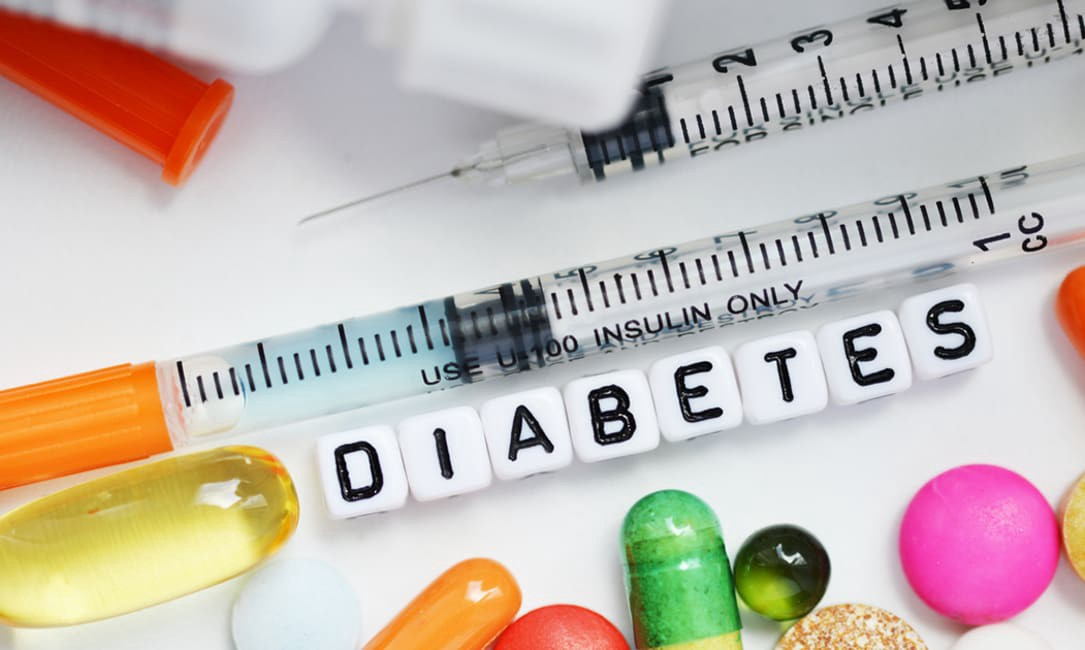  <font color= Red>  **Diabetes Prediction**: </font>
<br><font color= Black>*KUMAR CHANDAN*</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats

In [2]:
diabetes_df = pd.read_csv(r"C:\Users\dell\Documents\health care diabetes.csv")

In [3]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# <font color= Balck> <b>Dataset Info:</font>

In [4]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# <font color= Black> <b>Exploring variables using histogram:</font>

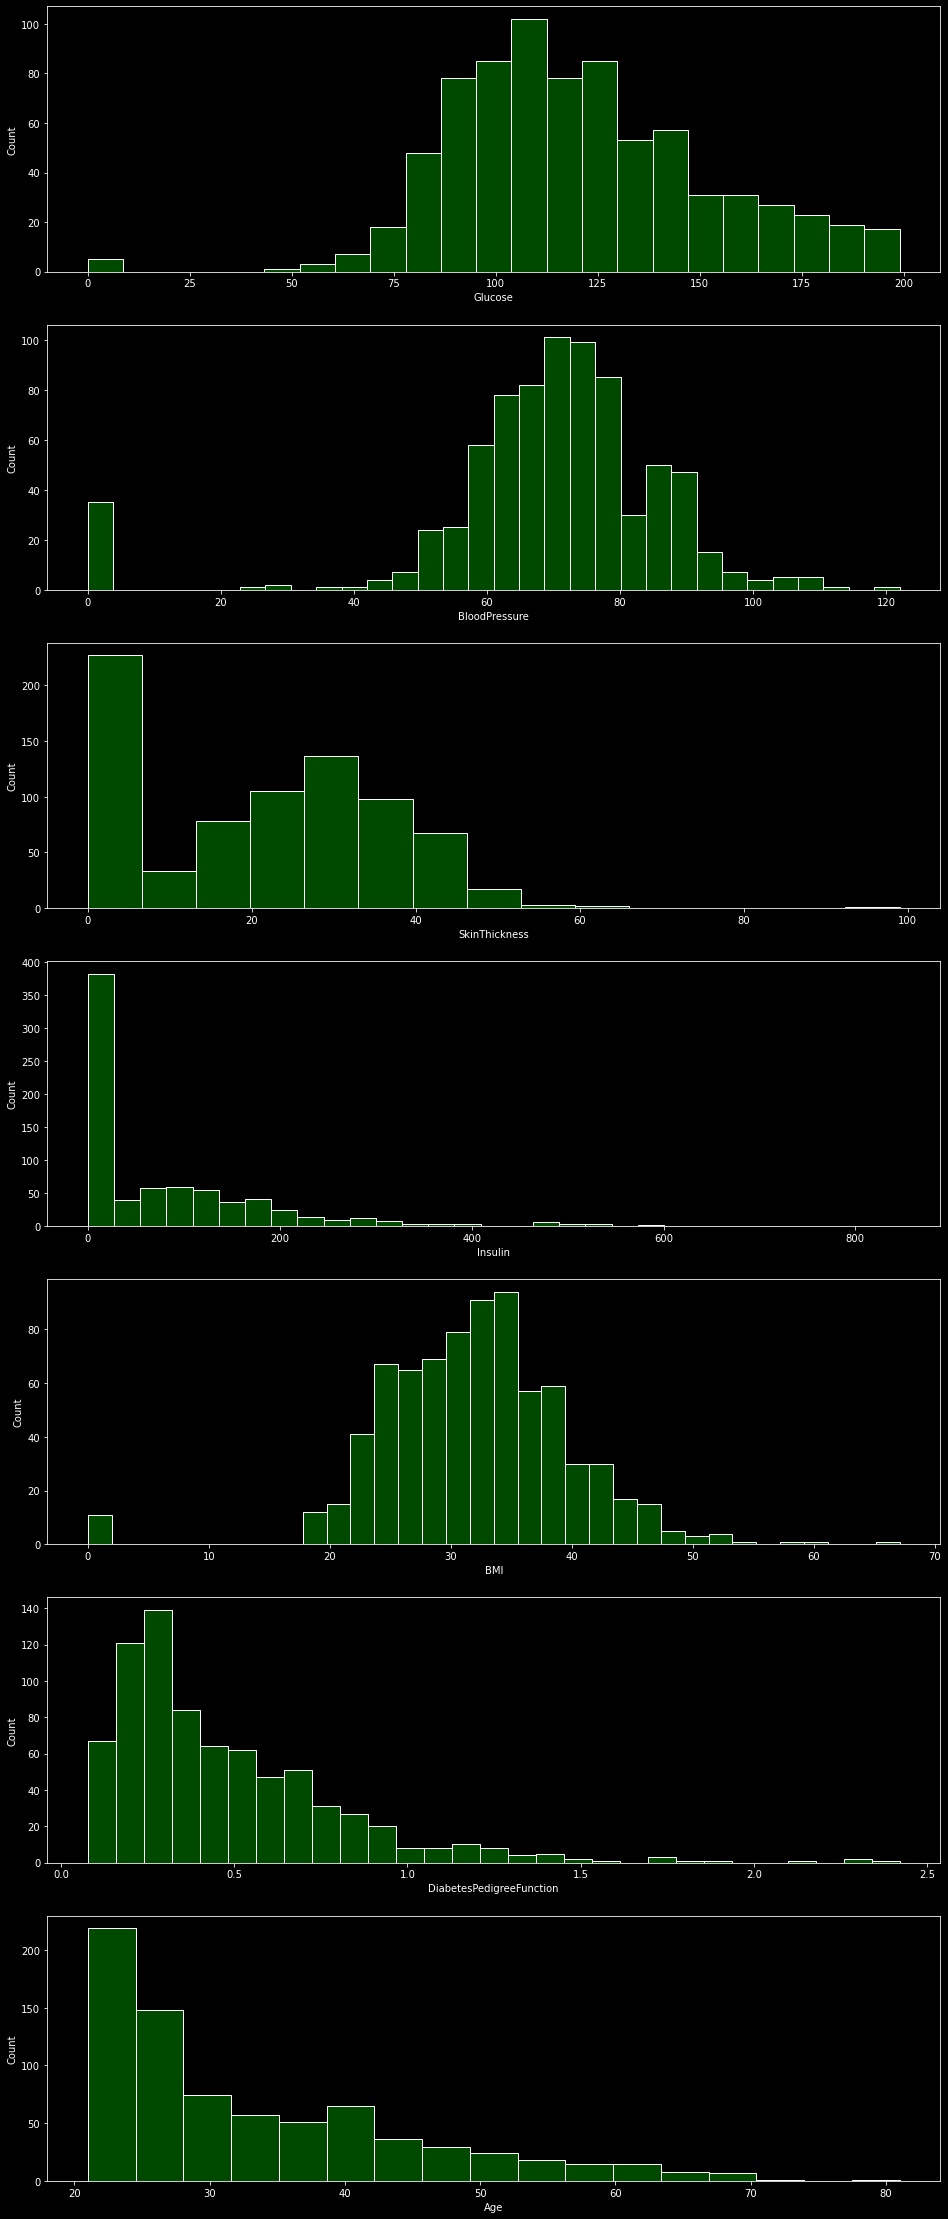

In [5]:
fig, ax = plt.subplots(7,figsize=(16,40))
df_hist = diabetes_df.iloc[:,1:8]
for i,column in enumerate(df_hist):
    sns.histplot(df_hist[column],ax= ax[i],color='Darkgreen')

# <font color= Black>  <b> Observations: </font>
- ####  There are 768 rows and 9 columns in the dataset. 
- ####  The **'Outcome'** feature is our target variable where  <font color= Black><b> '0'</font>: <font color= Green><b>Patient without Diabetes </font> , <font color= Black><b>'1'</font> : <font color= Red><b>Patient with Diabetes</font>.
- ####  Some features in the dataset have **'0'** as a value rather than Nan for missing values. 
   

#  <font color= Black > <b>Checking for total zero values in the columns:  </font>

In [6]:
for column in diabetes_df.columns:
    zero_values = len(diabetes_df[diabetes_df[column]==0])
    print(f'Zero values in column {column} = {zero_values}')

Zero values in column Pregnancies = 111
Zero values in column Glucose = 5
Zero values in column BloodPressure = 35
Zero values in column SkinThickness = 227
Zero values in column Insulin = 374
Zero values in column BMI = 11
Zero values in column DiabetesPedigreeFunction = 0
Zero values in column Age = 0
Zero values in column Outcome = 500


# <font color= Black> <b> Null Values </font>

In [7]:
#Converting zeroes into NaN values
diabetes_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [9]:
df_null = pd.DataFrame(diabetes_df.isnull().sum())
df_null.columns = ["Null Values"]
df_null.style.background_gradient(cmap= 'Pastel2').set_properties(**{'border': '1.3px solid blue','color':'Black'})

,Null Values
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Text(0.5, 1.0, 'Missing Values in the columns')

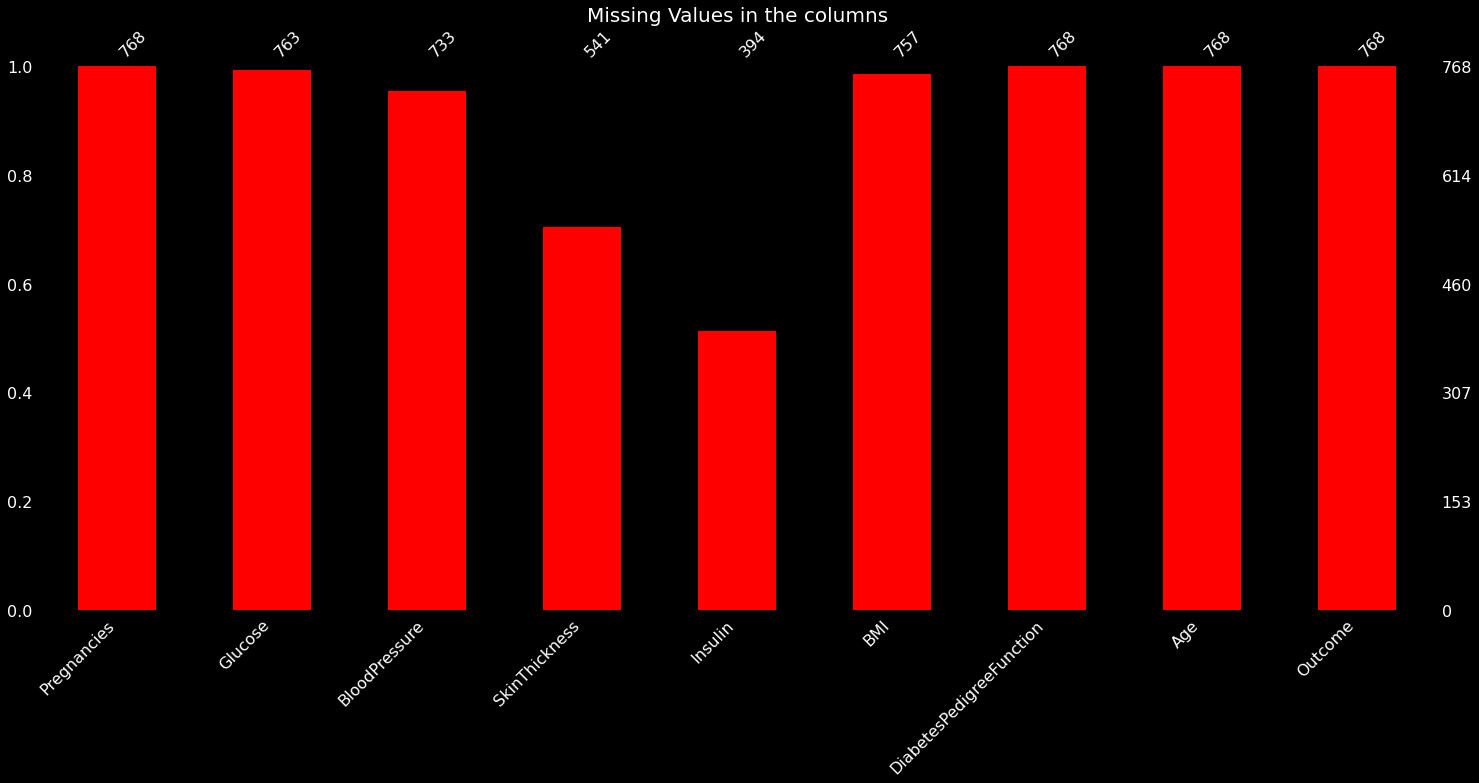

In [10]:
import missingno as msno
msno.bar(diabetes_df,color ='Red')
plt.title("Missing Values in the columns",size=20)

In [11]:
Null_features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

# <font color= Black> <b> Data Summary:</font>

In [12]:
diabetes_df.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000000,3.845052,3.369578,0.000000,1.000000,3.000000,6.000000,17.000000
Glucose,763.000000,121.686763,30.535641,44.000000,99.000000,117.000000,141.000000,199.000000
BloodPressure,733.000000,72.405184,12.382158,24.000000,64.000000,72.000000,80.000000,122.000000
SkinThickness,541.000000,29.153420,10.476982,7.000000,22.000000,29.000000,36.000000,99.000000
Insulin,394.000000,155.548223,118.775855,14.000000,76.250000,125.000000,190.000000,846.000000
BMI,757.000000,32.457464,6.924988,18.200000,27.500000,32.300000,36.600000,67.100000
DiabetesPedigreeFunction,768.000000,0.471876,0.331329,0.078000,0.243750,0.372500,0.626250,2.420000
Age,768.000000,33.240885,11.760232,21.000000,24.000000,29.000000,41.000000,81.000000
Outcome,768.000000,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


# <font color= Black> <b> Data type and count of variables:</font>

Text(0, 0.5, 'Data Type')

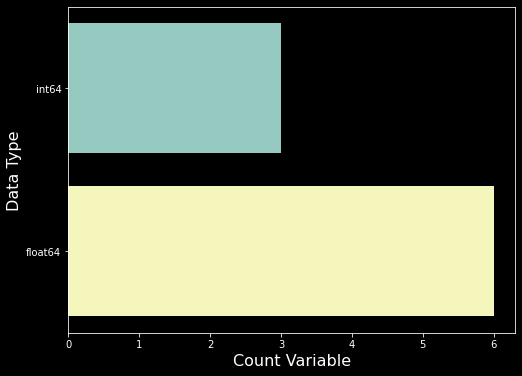

In [13]:
df_count = diabetes_df.dtypes
plt.figure(figsize=(8,6))
sns.countplot(y=df_count, data = diabetes_df )
plt.xlabel("Count Variable",size=16)
plt.ylabel("Data Type",size=16)

# <font color= Black> <b> Outcome Variable: </font>

In [14]:
diabetes_count = diabetes_df['Outcome'].value_counts()
diabetes_count

0    500
1    268
Name: Outcome, dtype: int64

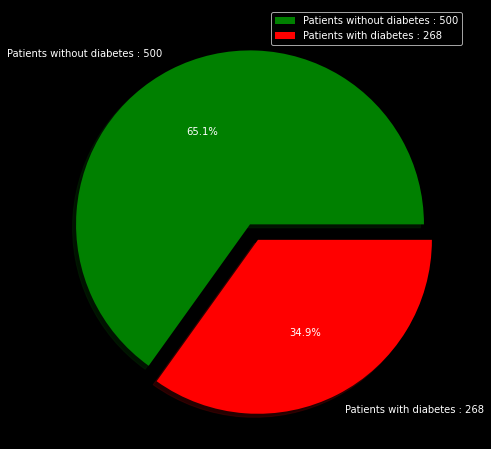

In [15]:
labels = ['Patients without diabetes : 500', 'Patients with diabetes : 268']
plt.figure(figsize=(10,8))
plt.pie(diabetes_count,explode = [0,0.1],autopct='%1.1f%%',shadow=True, labels = labels,colors = ['Green','Red'] )
plt.legend()

### We have imbalanced  Outcome Data.

# <font color= Black> <b> Correlation Analysis: </font>

<AxesSubplot:>

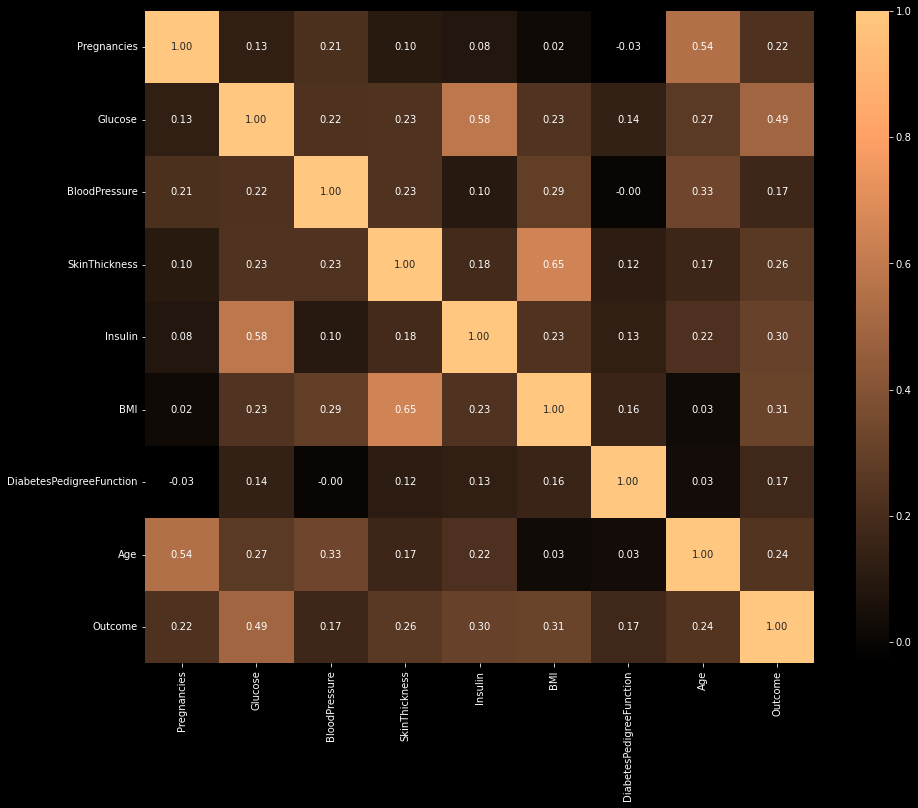

In [16]:
corr = diabetes_df.corr()
fig,ax = plt.subplots(figsize= (15,12))
sns.heatmap(corr,annot=True,cmap= 'copper',fmt=".2f",ax=ax)

# <font color= Black> <b> Exploring relationship between strongly correlated variables:</font>

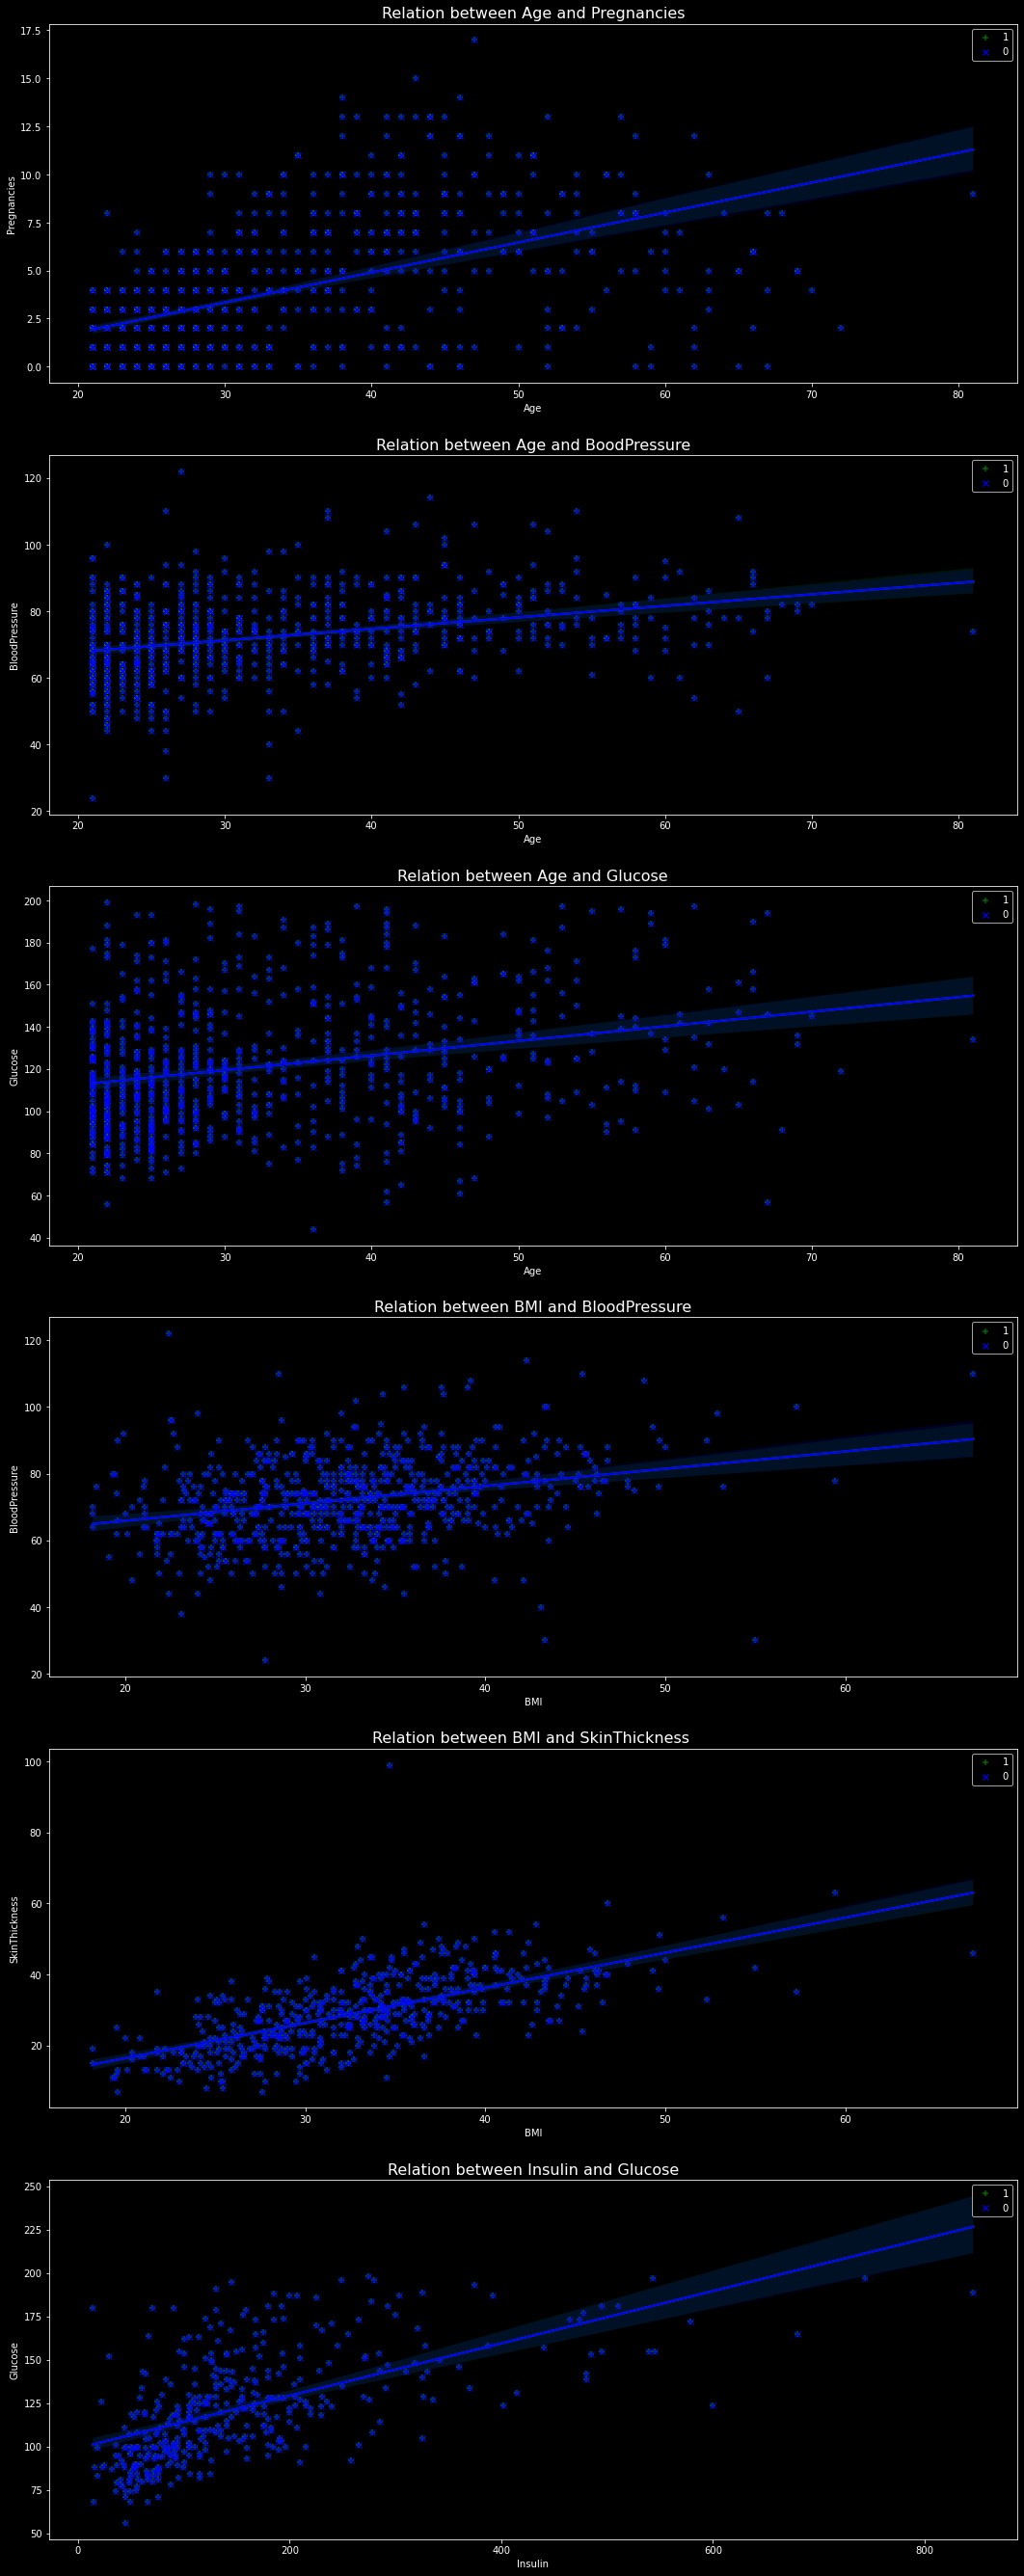

In [17]:
fig,ax =plt.subplots(6,figsize=(18,48))

colors = ['Green','Blue']
markers = ['+','x']

for i,value in enumerate(diabetes_df.Outcome.unique()):
    ax[0] = sns.regplot(data=diabetes_df, x= 'Age', y= 'Pregnancies',ax= ax[0],color= colors[i],marker= markers[i], label= value)
    ax[0].legend(loc='best')
    ax[0].set_title("Relation between Age and Pregnancies",size=16)
    ax[1] = sns.regplot(data=diabetes_df, x= 'Age', y= 'BloodPressure',ax= ax[1],color= colors[i],marker= markers[i], label= value)
    ax[1].legend(loc='best')
    ax[1].set_title("Relation between Age and BoodPressure",size=16)
    ax[2] = sns.regplot(data=diabetes_df, x= 'Age', y= 'Glucose',ax= ax[2],color= colors[i],marker= markers[i], label= value)
    ax[2].legend(loc='best')
    ax[2].set_title("Relation between Age and Glucose",size=16)
    ax[3] = sns.regplot(data=diabetes_df, x= 'BMI', y= 'BloodPressure',ax= ax[3],color= colors[i],marker= markers[i], label= value)
    ax[3].legend(loc='best')
    ax[3].set_title("Relation between BMI and BloodPressure",size=16)
    ax[4] = sns.regplot(data=diabetes_df, x= 'BMI', y= 'SkinThickness',ax= ax[4],color= colors[i],marker= markers[i], label= value)
    ax[4].legend(loc='best')
    ax[4].set_title("Relation between BMI and SkinThickness ",size=16)
    ax[5] = sns.regplot(data=diabetes_df, x= 'Insulin', y= 'Glucose',ax= ax[5],color= colors[i],marker= markers[i], label= value)
    ax[5].legend(loc='best')
    ax[5].set_title("Relation between Insulin and Glucose",size=16)

### All the relationships above are positive

In [18]:
X = diabetes_df.iloc[:,0:8]
Y = diabetes_df.iloc[:,[8]]
features = X.columns.tolist()

In [19]:
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

# Treating Outliers:

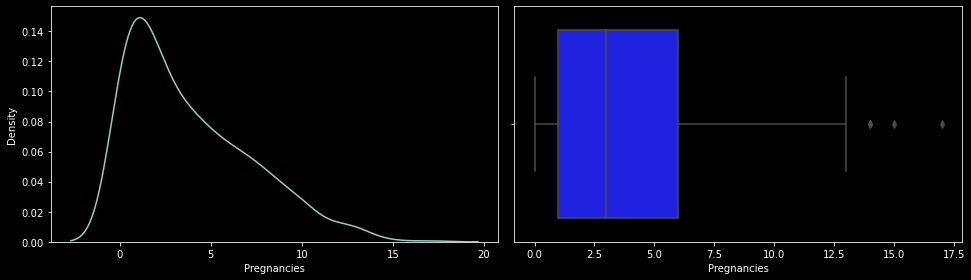

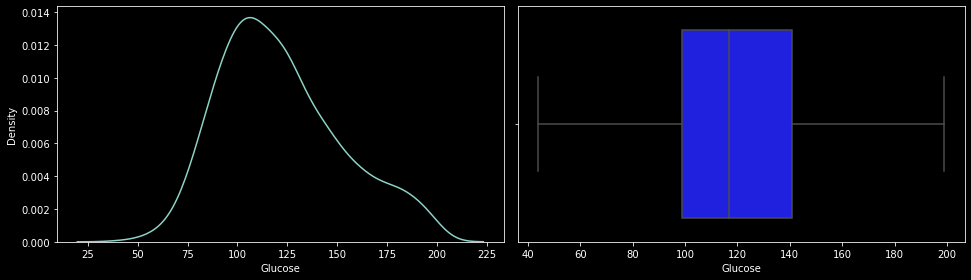

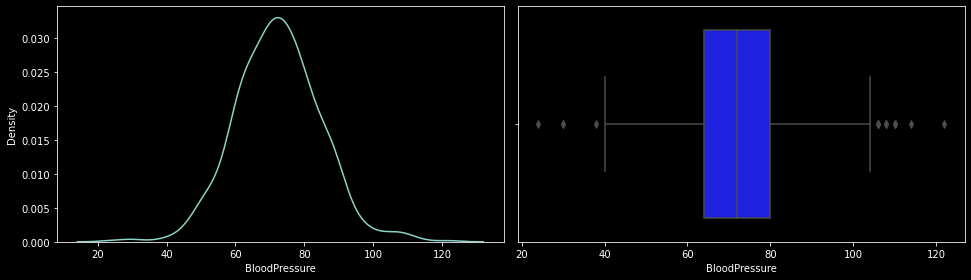

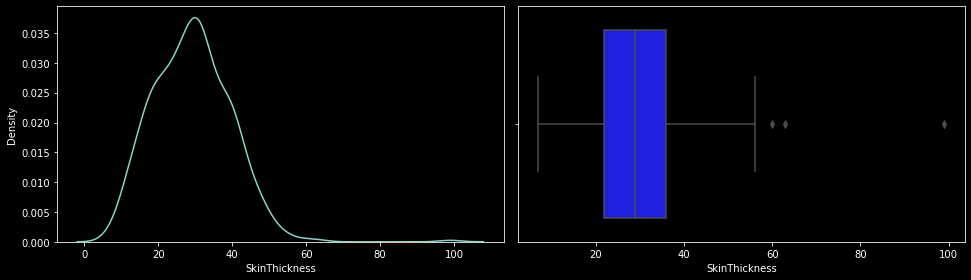

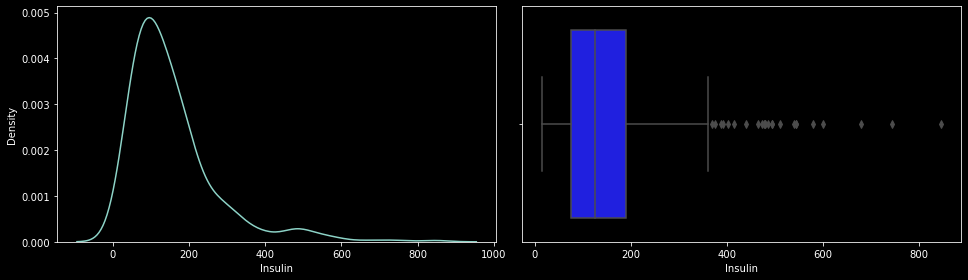

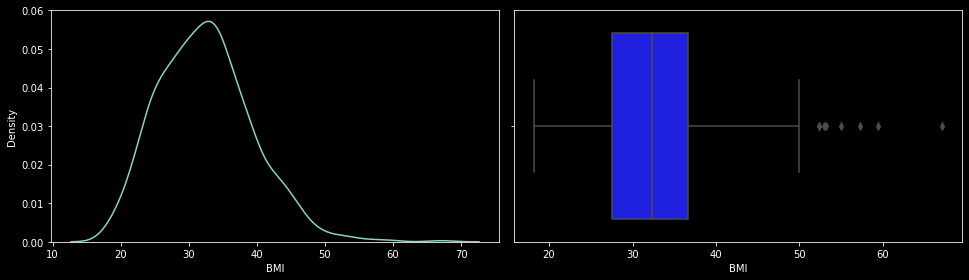

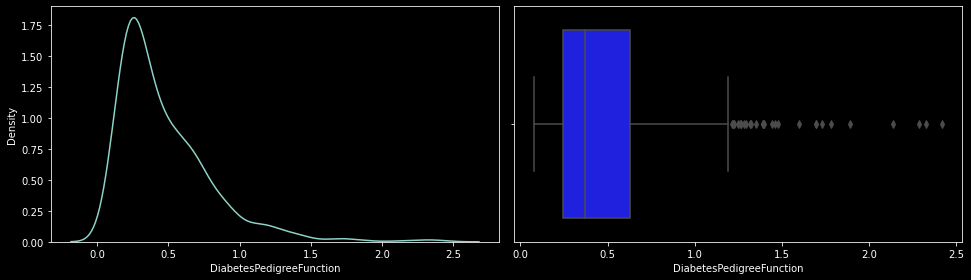

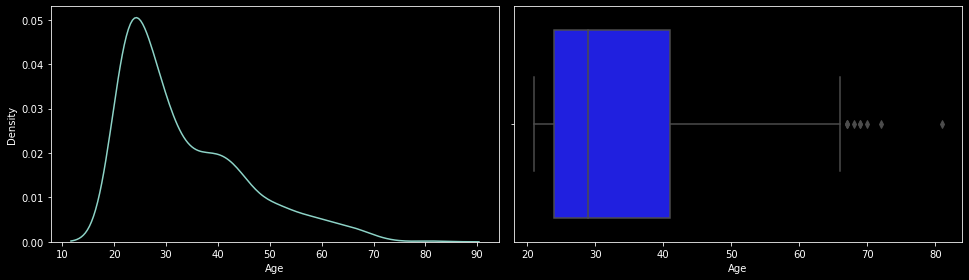

In [20]:
for col in features:
    plt.figure(figsize=(20,4))
    plt.subplot(131)
    sns.distplot(X[col],hist=False)
    plt.subplot(132)
    sns.boxplot(X[col],color='Blue')
    plt.tight_layout()
    plt.show()

In [21]:
def IQR_Outielrs(X,features):
    
    print(f"Number of features: {len(features)}")
    print(f"Features : {features}")
    print(f"Number of samples: {X.shape[0]}")
          
    Outliers_Index_List = []
    
    for col in features:
          
          #Using nanpercentile instead of percentile because of nan values
          Q1 = np.nanpercentile(X[col],25.)
          Q3 = np.nanpercentile(X[col],75.)
          
          cut_off = (Q3-Q1) * 1.5
          upper, lower = Q3 + cut_off, Q1 - cut_off
          
          print(f"\nFeature: {col}")
          print(f"Upper and Lower limits: {upper},{lower}")
          
          Outliers_Index = X[col][(X[col] < lower) | (X[col] > upper)].index.tolist()
          Outliers = X[col][(X[col] < lower) | (X[col] > upper)].values
          
          print(f"Number of Outliers: {len(Outliers)}")
          print(f"Outliers Index: {Outliers_Index}")
          print(f"Outliers: {Outliers}")
          
          Outliers_Index_List.extend(Outliers_Index)
            
    #using set to remove duplicates
    
    Outliers_Index_List.sort()
    
    print(f"\nNumber of rows with outliers: {len(Outliers_Index_List)}")
    print(f"List of rows with outliers : {Outliers_Index_List}")
    
IQR_Outielrs(X,features)


Number of features: 8
Features : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Number of samples: 768

Feature: Pregnancies
Upper and Lower limits: 13.5,-6.5
Number of Outliers: 4
Outliers Index: [88, 159, 298, 455]
Outliers: [15 17 14 14]

Feature: Glucose
Upper and Lower limits: 204.0,36.0
Number of Outliers: 0
Outliers Index: []
Outliers: []

Feature: BloodPressure
Upper and Lower limits: 104.0,40.0
Number of Outliers: 14
Outliers Index: [18, 43, 84, 106, 125, 177, 362, 549, 597, 599, 658, 662, 672, 691]
Outliers: [ 30. 110. 108. 122.  30. 110. 108. 110.  24.  38. 106. 106. 106. 114.]

Feature: SkinThickness
Upper and Lower limits: 57.0,1.0
Number of Outliers: 3
Outliers Index: [57, 445, 579]
Outliers: [60. 63. 99.]

Feature: Insulin
Upper and Lower limits: 360.625,-94.375
Number of Outliers: 24
Outliers Index: [8, 13, 111, 153, 186, 220, 228, 231, 247, 248, 258, 286, 370, 392, 409, 415, 486, 584, 645, 655, 695, 710

In [22]:
X = X.copy()

In [23]:
def IQR_Capping(df,cols,factor):
    
    for col in cols:
        q1 = np.nanpercentile(df[col],25.)
        q3 = np.nanpercentile(df[col],75.)
        IQR = q3 - q1
        Lower_whisker = q1 - (factor*IQR)
        Upper_whisker = q3 + (factor*IQR)
        
        df[col] = np.where(df[col]>Upper_whisker,Upper_whisker,
                     np.where(df[col] < Lower_whisker, Lower_whisker,df[col]))

In [24]:
IQR_Capping(X,features,1.5)

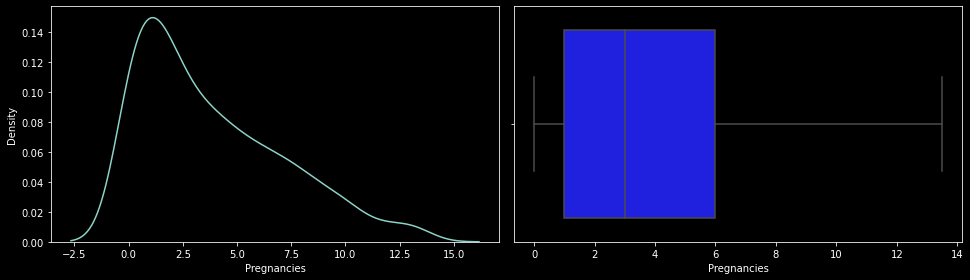

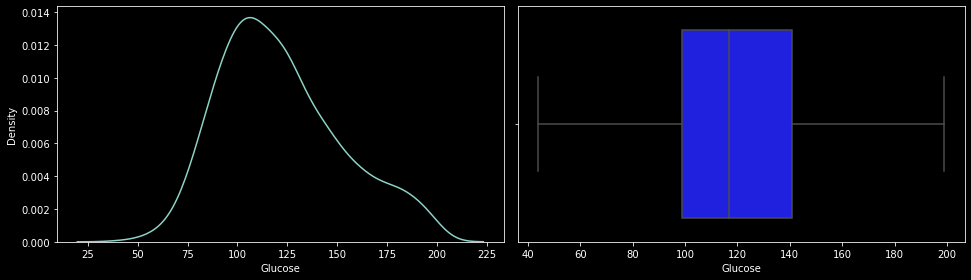

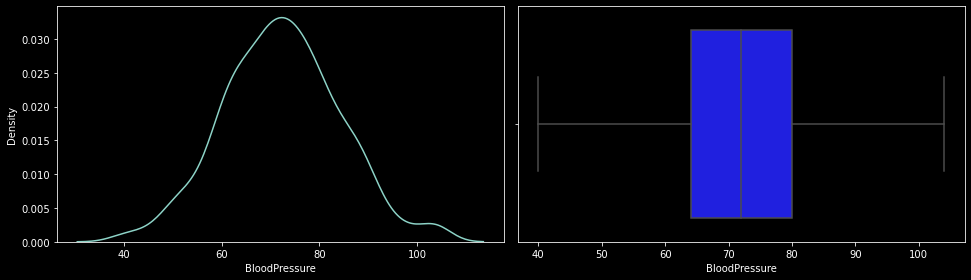

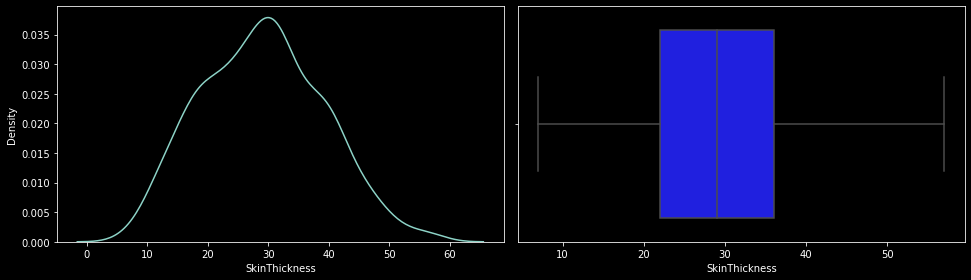

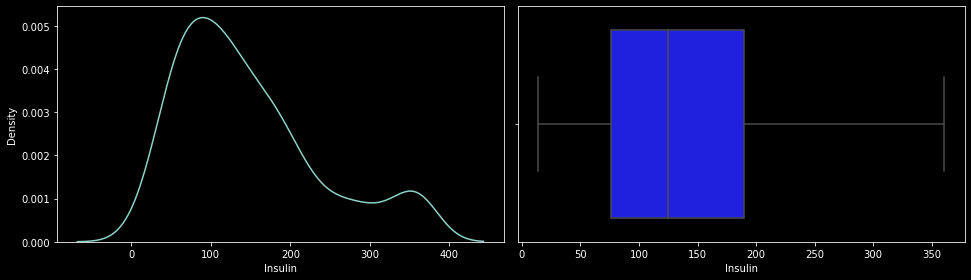

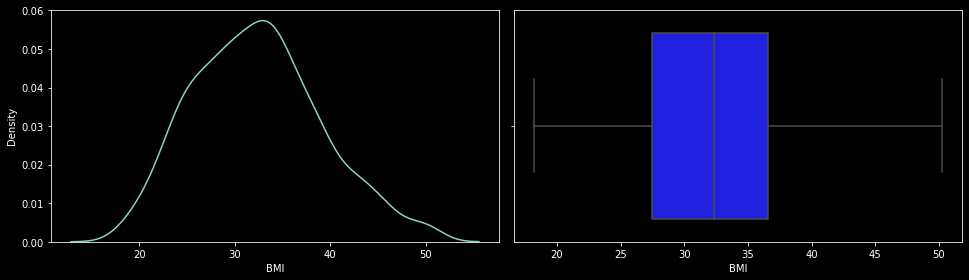

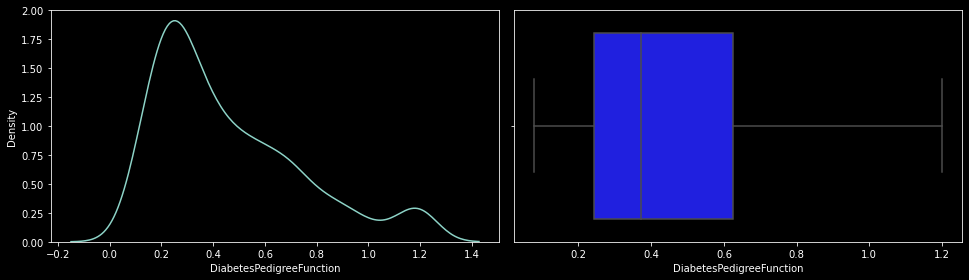

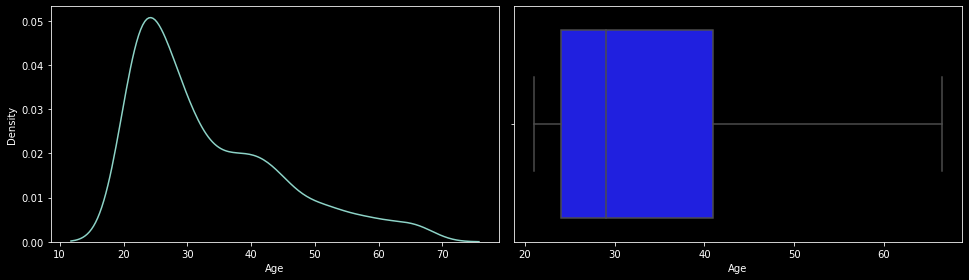

In [25]:
for col in features:
    plt.figure(figsize=(20,4))
    plt.subplot(131)
    sns.distplot(X[col],hist=False)
    plt.subplot(132)
    sns.boxplot(X[col],color='Blue')
    plt.tight_layout()
    plt.show()

In [26]:
from sklearn.model_selection import train_test_split as split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score

# <font color= Blue> <b>Data Preprocessing : </font>

In [27]:
xgb_r = XGBRegressor(n_estimators=100)
imputer = IterativeImputer(estimator=xgb_r,random_state=1,imputation_order='roman')
X_new = imputer.fit_transform(X)
X_new = pd.DataFrame(X_new,columns=X.columns)
X_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.000000,175.826355,33.6,0.627,50.0
1,1.0,85.0,66.0,29.000000,74.546707,26.6,0.351,31.0
2,8.0,183.0,64.0,22.775534,223.966599,23.3,0.672,32.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,1.200,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171,63.0
764,2.0,122.0,70.0,27.000000,208.433640,36.8,0.340,27.0
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0
766,1.0,126.0,60.0,30.293245,110.396500,30.1,0.349,47.0


In [28]:
X_train,X_test,Y_train,Y_test = split(X_new,Y,test_size=0.3,random_state=10)

# Handling the Imbalance in data

In [29]:
Y_train.value_counts()

Outcome
0          356
1          181
dtype: int64

In [30]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train,Y_train = sm.fit_resample(X_train, Y_train)

In [31]:
Y_train.value_counts()

Outcome
0          356
1          356
dtype: int64

In [32]:
X_train.shape,Y_train.shape

((712, 8), (712, 1))

# <font color= Blue> <b>Base models :</font>

In [33]:
models = []
models.append(('RF',RandomForestClassifier(random_state=123)))
models.append(('XGB',XGBClassifier(random_state=123,eval_metric= 'logloss')))
models.append(('KNN',KNeighborsClassifier()))

results= []
names = []

In [34]:
for name,model in models:
    cv_results = cross_val_score(model,X_train,Y_train,cv=10,scoring='accuracy',)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()}")

RF: 0.8413928012519563
XGB: 0.8414710485133021
KNN: 0.77820813771518


## Random Froest classifier and XGboost classifier have better accuracy than KNN classifier.
### <font color= Red> <b> (The reason for lower accuracy for KNN model can be the  differnt scale of the feature values as we have not used scaling transformer and it uses euclidean distance as measure. But beacuse we are going to use RandomForest and XGBoost  Classifiers to train our model that rely on rules(Decision trees) and will not be affected by different scale.) 

# <font color= Blue> <b>HyperParameter Tuning:</font>

## RandomForest Classifier:

In [35]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# 108 diff random forest train

In [36]:
param_grid_RF = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
print(param_grid_RF)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [37]:
RF = RandomForestClassifier()

In [38]:
RF_Grid = GridSearchCV(estimator = RF, 
                       param_grid = param_grid_RF, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [39]:
RF_Grid.fit(X_train,Y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [40]:
RF_Grid.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 120}

In [41]:
RF_Grid.best_score_

0.8441347385009358

# <font color= Blue>Final Model:</font> 
### RandomForestClassifier

In [42]:
RF_Tuned = RandomForestClassifier(max_depth=None,max_features=0.6,max_samples=1.0,n_estimators = 120,random_state=1)

In [43]:
RF_Model = RF_Tuned.fit(X_train,Y_train)

In [44]:
cross_val_score(RF_Model, X_train,Y_train , cv = 10).mean()

0.8386150234741784

In [45]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc,roc_auc_score

In [46]:
RF_predict = RF_Tuned.predict(X_test)

In [47]:
accuracy_score(y_true=Y_test,y_pred=RF_predict)

0.7619047619047619

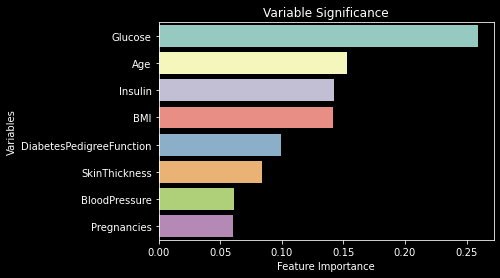

In [48]:
feature_imp = pd.Series(RF_Tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance')
plt.ylabel('Variables')
plt.title("Variable Significance")
plt.show()


In [49]:
print(classification_report(y_true=Y_test,y_pred = RF_predict))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       144
           1       0.71      0.62      0.66        87

    accuracy                           0.76       231
   macro avg       0.75      0.73      0.74       231
weighted avg       0.76      0.76      0.76       231



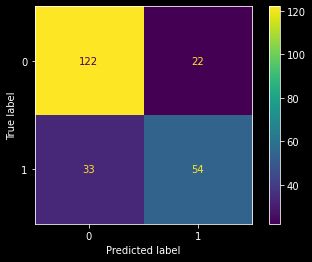

In [50]:
plot_confusion_matrix(RF_Tuned,X_test,Y_test)

In [51]:
from sklearn.metrics import roc_auc_score

In [52]:
roc_auc_score(Y_test,RF_predict)

0.733955938697318

Text(0, 0.5, 'True positive rate-->')

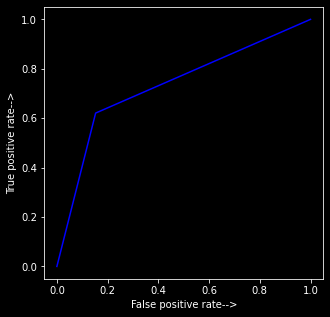

In [53]:
RF_fpr,RF_tpr,threshold = roc_curve(Y_test,RF_predict)
RF_auc = auc(RF_fpr,RF_tpr)

plt.figure(figsize=(5,5))
plt.plot(RF_fpr,RF_tpr, color = 'Blue')
plt.xlabel("False positive rate-->")
plt.ylabel("True positive rate-->")


## XGBoost Classifier:

In [54]:
#boosting learning rate (xgb’s “eta”)
learning_rate =[0.05,0.10,0.15,0.20]

# Maximum tree depth for base learners
max_depth = [3,4,5,6]

#Minimum sum of instance weight needed in a child
min_child_weight = [1,3,5,7]

# Minimum loss reduction required to make a further partition on a leaf node of the tree
gamma = [0.1,0.2,0.3,0.4]

n_estimators = [20,60,100,120]

In [55]:
XGB_params = {'learning_rate': learning_rate,
             'max_depth': max_depth,
             'min_child_weight':min_child_weight,
             'gamma':gamma,
             'n_estimators':n_estimators}
print(XGB_params)

{'learning_rate': [0.05, 0.1, 0.15, 0.2], 'max_depth': [3, 4, 5, 6], 'min_child_weight': [1, 3, 5, 7], 'gamma': [0.1, 0.2, 0.3, 0.4], 'n_estimators': [20, 60, 100, 120]}


In [56]:
XGB = XGBClassifier()

In [57]:
XGB_Grid = GridSearchCV(estimator=XGB,
                       param_grid= XGB_params,
                       cv=5,
                       verbose=True,
                       n_jobs=-1)

In [58]:
XGB_Grid.fit(X_train,Y_train)

Fitting 5 folds for each of 1024 candidates, totalling 5120 fits
[15:48:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             n_jobs=-1,
             param_grid={'gamma': [0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.05, 0.1, 0.15, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_weight': [1, 3, 5, 7],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=True)

In [59]:
XGB_Grid.best_params_

{'gamma': 0.1,
 'learning_rate': 0.2,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 60}

In [60]:
XGB_Grid.best_score_

0.8427853836304541

#  <font color= Blue>Final Model:</font> 


### XGBClassifier

In [61]:
XGB_Tuned = XGBClassifier(gamma=0.1,learning_rate = 0.05,max_depth = 4, min_child_weight = 5,n_estimators = 60,eval_metric= 'logloss')

In [62]:
XGB_Model = XGB_Tuned.fit(X_train,Y_train)

In [63]:
cross_val_score(XGB_Model, X_train,Y_train , cv = 10).mean()

0.8006651017214399

In [64]:
XGB_Predict = XGB_Tuned.predict(X_test)

In [65]:
accuracy_score(y_true=Y_test,y_pred=XGB_Predict)

0.7489177489177489

In [66]:
print(classification_report(y_true=Y_test,y_pred = XGB_Predict))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80       144
           1       0.66      0.69      0.67        87

    accuracy                           0.75       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.75      0.75      0.75       231



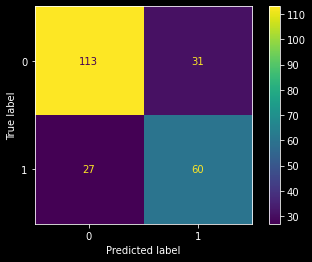

In [67]:
plot_confusion_matrix(XGB_Tuned,X_test,Y_test)

In [68]:
roc_auc_score(Y_test,XGB_Predict)

0.7371886973180077

Text(0, 0.5, 'True positive rate-->')

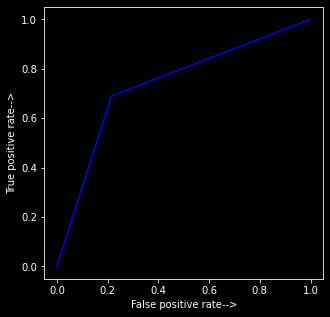

In [69]:
XGB_fpr,XGB_tpr,threshold = roc_curve(Y_test,XGB_Predict)
XGB_auc = auc(XGB_fpr,XGB_tpr)

plt.figure(figsize=(5,5))
plt.plot(XGB_fpr,XGB_tpr, color = 'Blue')
plt.xlabel("False positive rate-->")
plt.ylabel("True positive rate-->")


# <font color= Blue>Classification Report:</font>
- ###    For diabetes prediction , the False Negatives are more crititcal errors , so XGBClassifier model with higher recall is better than RandomForestClassifier model.
- ###    Our models with both the classifiers are performing well on tarining dataset, but have lower accuracy with test data.(Clearly overfitting) We can work with feature tranformations, selection and construction to improve our models. We can also tune different hyperparameters to improve. 